# Demonstration of SVM with different C, Kernel, and Gamma values

This notebook demonstrates how Support Vector Machines (SVM) behave with different values of `C`, `kernel`, and `gamma`.
The Iris dataset is used, and for simplicity, we only consider the first two features to visualize the decision boundaries.

### Parameters:
- **C**: Regularization parameter. It controls the trade-off between having a wide margin and classifying training examples correctly.
- **Kernel**: Defines the function type used to transform the data (linear, polynomial, or radial basis function).
- **Gamma**: Controls the complexity of the boundary when using the RBF kernel.



## Binary classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate a binary classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=150, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, 
                           flip_y=0.05, class_sep=0.5, random_state=42)

In [3]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Train SVM for binary classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(C=1, kernel='rbf', gamma='scale')  # Linear kernel for binary classification
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


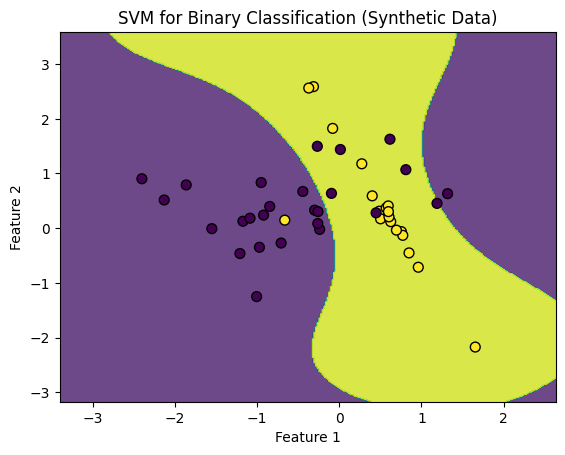

In [5]:
# Plotting decision regions
def plot_svm_decision_regions(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k', s=50)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM for Binary Classification (Synthetic Data)')
    plt.show()

# Plot decision regions
plot_svm_decision_regions(X_test, y_test, svm)

## More than binary classification

In [6]:
# Load dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for easy visualization
y = iris.target

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Different configurations for SVM
parameters = [
    {'C': 1, 'kernel': 'linear', 'gamma': 'scale'},
    {'C': 10, 'kernel': 'linear', 'gamma': 'scale'},
    {'C': 1, 'kernel': 'rbf', 'gamma': 0.1},
    {'C': 1, 'kernel': 'rbf', 'gamma': 1},
    {'C': 10, 'kernel': 'rbf', 'gamma': 0.1},
    {'C': 10, 'kernel': 'rbf', 'gamma': 1}
]

In [9]:
# Function to plot the decision boundaries
def plot_decision_boundaries(svm, X, X_train, X_test, y_train, y_test, ax, title):
    # Create a grid to plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and points
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolor='k', s=20, label='Train')  # Filled marker
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='^', s=80, label='Test', edgecolor='k')  # Filled marker
    
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

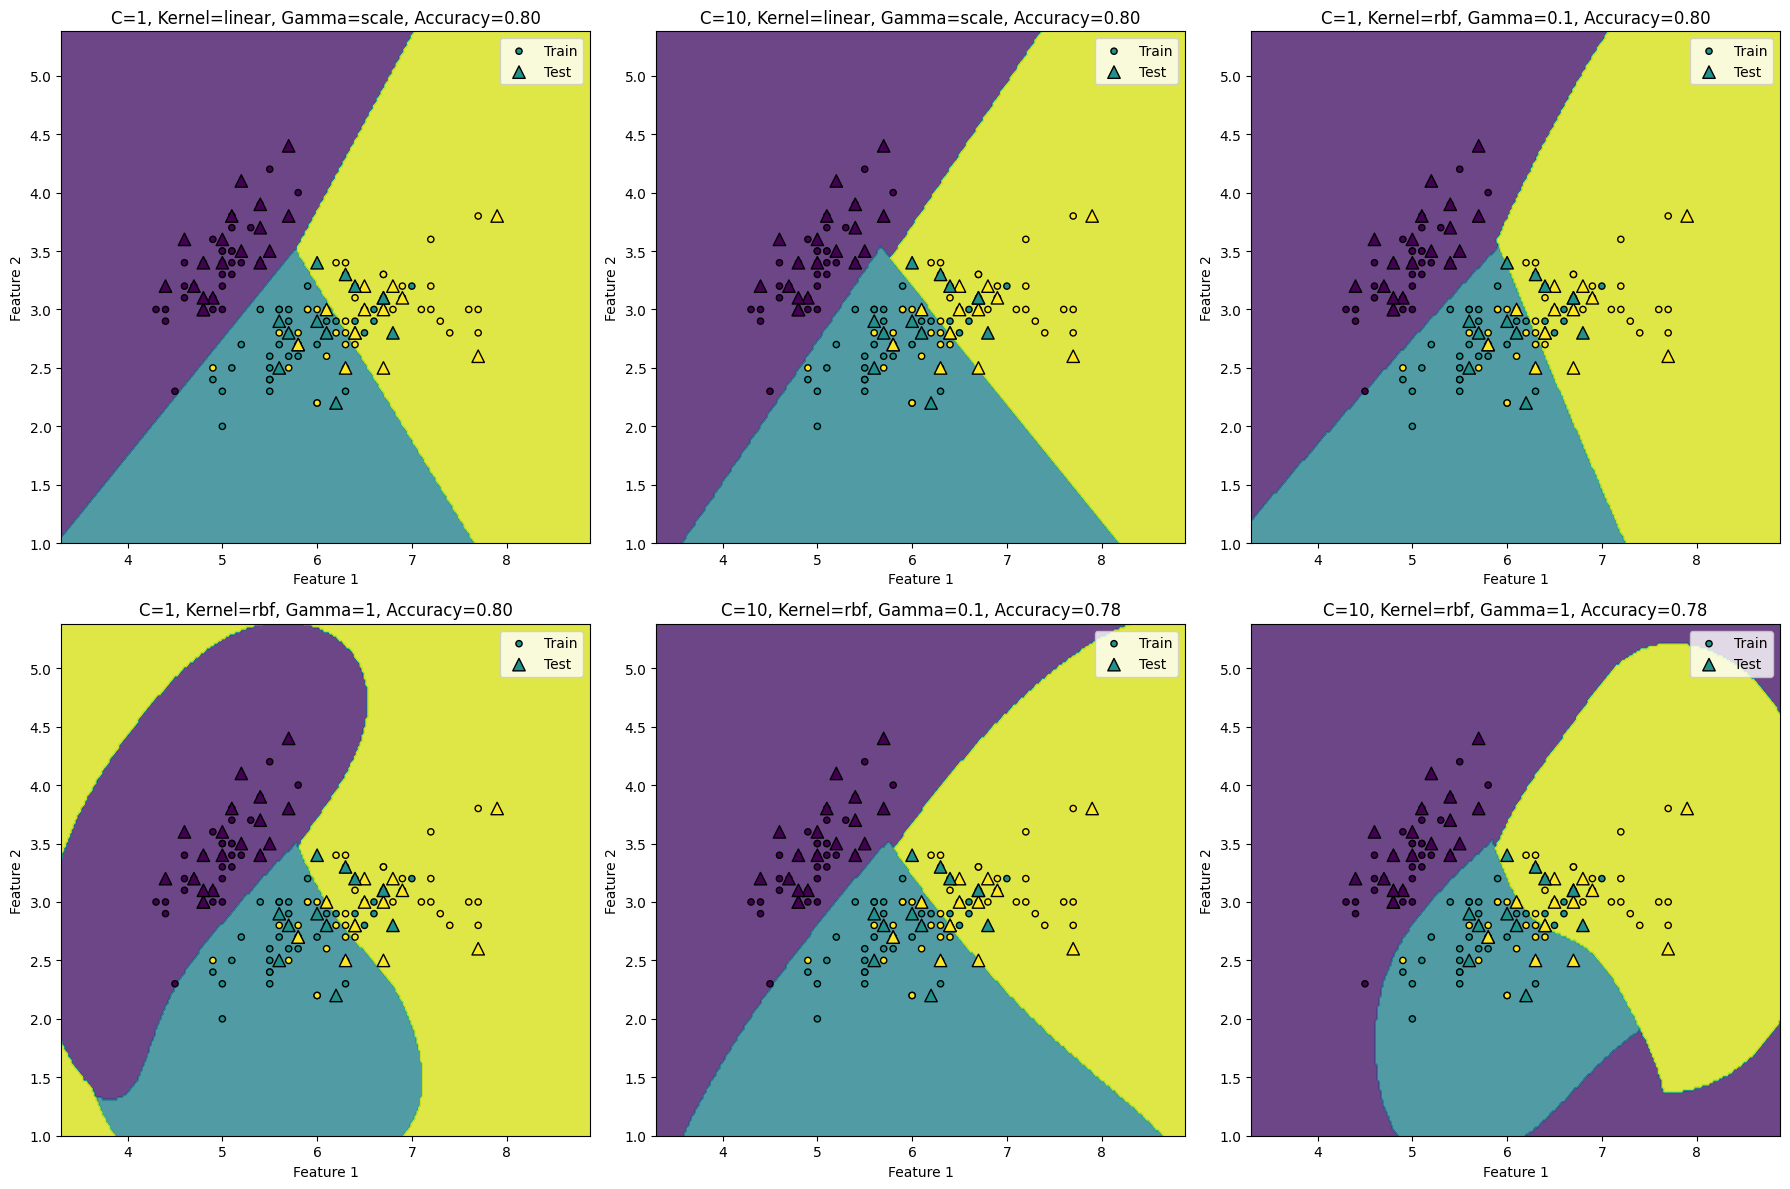

In [10]:
# Plot decision boundaries for different parameter combinations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, param in enumerate(parameters):
    # decision_function_shape = 
    # 'ovr' One-vs-Rest (OvR) 
    # 'ovo' One-vs-One (OvO)
    svm = SVC(C=param['C'], kernel=param['kernel'], gamma=param['gamma'], decision_function_shape='ovr')
    svm.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Prepare title with parameter details and accuracy
    title = f"C={param['C']}, Kernel={param['kernel']}, Gamma={param['gamma']}, Accuracy={accuracy:.2f}"
    
    # Plot the decision boundaries
    ax = axes[i//3, i%3]
    plot_decision_boundaries(svm, X, X_train, X_test, y_train, y_test, ax, title)

plt.tight_layout()
